In [1]:
import os
import numpy as np
from tqdm import tqdm

from dataloaders import make_data_loader
from modeling.deeplab import *
from torchviz import make_dot, make_dot_from_trace

In [2]:
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

In [3]:
# Params
dataset = 'xview2_single'
batch_size = 2
base_size = 1024
crop_size = 256

In [4]:
args = AttrDict()
args.update({'dataset':dataset,
            'batch_size':batch_size,
            'base_size':base_size,
            'crop_size':crop_size})
train_loader, _, _, nclass = make_data_loader(args)

Number of images in train: 1999
Number of images in val: 800


In [5]:
model = DeepLab(num_classes=nclass,
                backbone='drn',
                output_stride=16,
                sync_bn=False,
                freeze_bn=False)

In [6]:
sample = next(iter(train_loader))  

In [7]:
output = model(sample['image'])

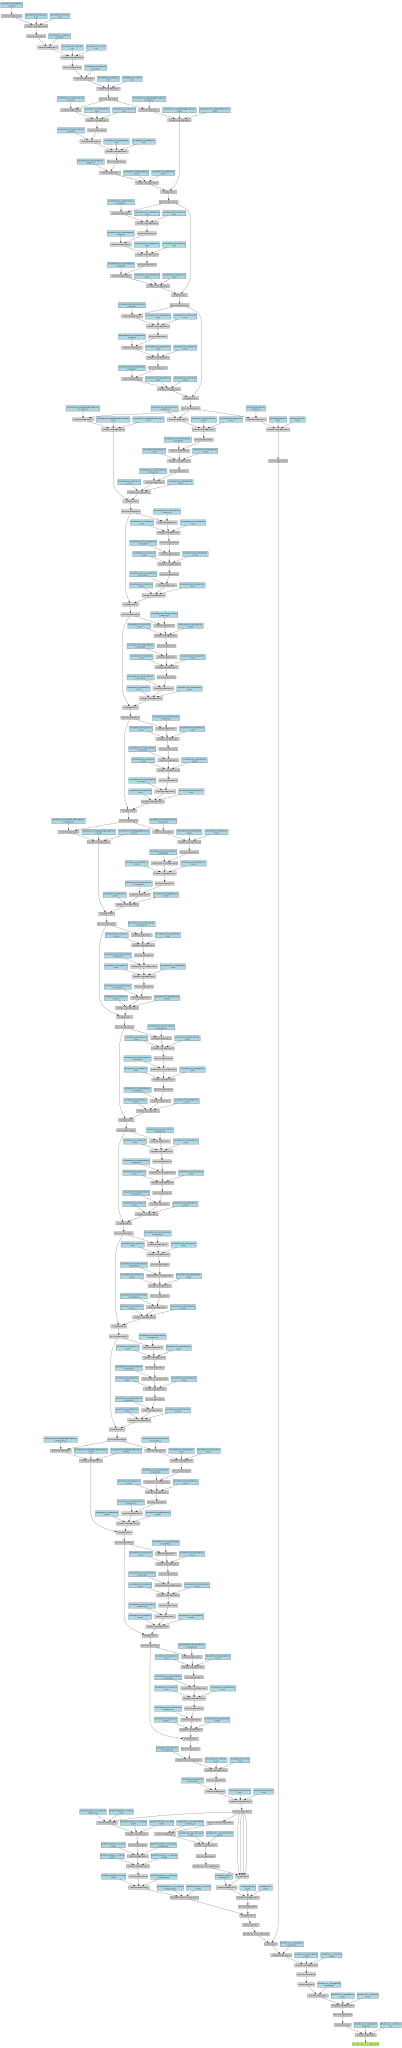

In [8]:
make_dot(output, params=dict(model.named_parameters()))